In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df_oneway = pd.read_csv("/import/freenas-m-05-seissol/kutschera/HIWI/paper01/Paraview/ssha_traces/ssha_one-way_sE_20s_Line2.csv")
df_fullycp = pd.read_csv("/import/freenas-m-05-seissol/kutschera/HIWI/paper01/Paraview/ssha_traces/ssha_fully-coupled_sE_20s_Line2.csv") #o6

In [9]:
def conversion_xy2length(x_start,y_start,x_end,y_end):
    from pyproj import Transformer
    transformer = Transformer.from_crs("utm27", "epsg:4326", always_xy=True)
    lon_start, lat_start = transformer.transform(x_start, y_start)
    lon_end, lat_end = transformer.transform(x_end, y_end)
    
    import geopy.distance 
    coords_1 = (lon_start, lat_start)
    coords_2 = (lon_end, lat_end)
    length = geopy.distance.geodesic(coords_1, coords_2).km
    return length 

In [10]:
x_start = df_oneway["Points:0"][0]
y_start = df_oneway["Points:1"][0]
x_end = df_oneway["Points:0"][len(df_oneway)-1]
y_end = df_oneway["Points:1"][len(df_oneway)-1]

length = conversion_xy2length(x_start,y_start,x_end,y_end)
length 

50.50276539580941

In [11]:
x_start = df_fullycp["Points:0"][0]
y_start = df_fullycp["Points:1"][0]
x_end = df_fullycp["Points:0"][len(df_fullycp)-1]
y_end = df_fullycp["Points:1"][len(df_fullycp)-1]

length = conversion_xy2length(x_start,y_start,x_end,y_end)
length 

50.50276539580941

In [12]:
#plt.plot(df.arc_length, df.ssha)

In [14]:
distance = np.linspace(0,length,len(df_fullycp))
len(distance)

10001

(-0.1, 0.1)

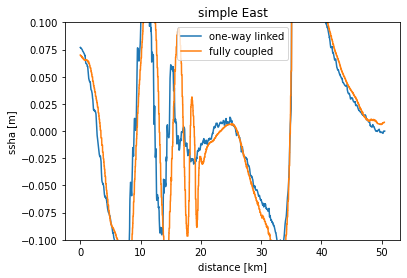

In [15]:
plt.plot(distance, df_oneway.ssha, label="one-way linked")
plt.plot(distance, df_fullycp.u3, label="fully coupled")
plt.title("simple East")
plt.xlabel('distance [km]')
plt.ylabel('ssha [m]')
plt.legend()
plt.ylim(-0.1,0.1)

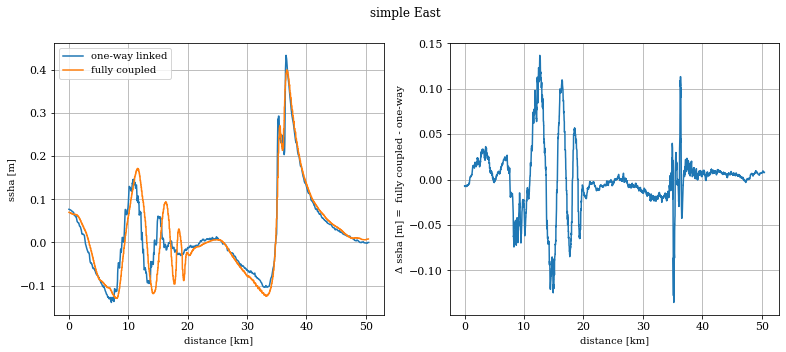

In [16]:
plt.rcParams["font.family"] = "serif"
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,5))
fig.suptitle("simple East")

ax1.plot(distance, df_oneway.ssha, label="one-way linked")
ax1.plot(distance, df_fullycp.u3, label="fully coupled")
ax1.set_xlabel('distance [km]')
ax1.set_ylabel('ssha [m]')
ax1.legend()
ax1.grid()

ax2.plot(distance, df_fullycp.u3-df_oneway.ssha)
ax2.set_ylabel('\u0394 ssha [m] =  fully coupled - one-way')
ax2.set_xlabel('distance [km]')
ax2.grid()